# Twitter Sentiment Analysis Stock Price Prediction

### - Crawl data

### - Sentiment Analysis

### - Predict Stock

## Import module

In [1]:
from textblob import TextBlob
import tweepy as tw
import json
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Set up token API

In [2]:
api_key = "HAcIeikl6eRheQP1oKYGDwPx0"
api_secret = "gEWmqG7QVXzudnviUXDo98L2UKGYg9PNqy1bAR1geClkHjqBGk"
access_token = "1481095074465579008-1pApYlU4HRJWpbAXcbdVEVGzdACuEz"
access_token_secret = "htgD81H4mOxXw5MglAljFRHhcfGAuwsNomXVqvGw0Obwe"
auth = tw.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

## Crawl data

In [3]:
def apiSearch(kw, number_of_tweets, tweets, user_id, created_at):
    for i in tw.Cursor(api.search, q = kw , lang ="en", since = "2022-01-14",tweet_mode = "extended").items(number_of_tweets):
        tweets.append(i.full_text)
        user_id.append(i.user.id)
        created_at.append(i.created_at)

In [4]:
number_of_tweets = 200
tweets = []
user_id =[]
created_at = []
keyword_list = ['Finance', 'Price', 'Shareholders', 'Stock']
company = 'Amazon'

# Crawl data from keywords
for i in range (len(keyword_list)):
    kw = str(company + ' ' + keyword_list[i])
    print(kw)
    for i in tw.Cursor(api.search, q = kw , lang ="en", since = "2022-01-14",tweet_mode = "extended").items(number_of_tweets):
        tweets.append(i.full_text)
        user_id.append(i.user.id)
        created_at.append(i.created_at)



Amazon Finance
Amazon Price
Amazon Shareholders
Amazon Stock


## Dataframe

In [5]:
df = pd.DataFrame({"Created_at": created_at,"User_id": user_id,"Tweets":tweets})
df

,Created_at,User_id,Tweets
0,2022-02-01 06:01:09,505801495,RT @YahooFinance: Why Amazon Prime may cost yo...
1,2022-02-01 05:15:59,1476001265587208194,RT @YahooFinance: Why Amazon Prime may cost yo...
2,2022-02-01 05:15:13,19546277,Why Amazon Prime may cost you more soon https:...
3,2022-02-01 04:26:15,1481342293902708739,"#HEDGED Bestselling Author Juliana Jones, of N..."
4,2022-02-01 04:24:14,2316191840,An Amazon warehouse manager faces up to 20 yea...
...,...,...,...
739,2022-02-01 03:06:33,1377519267143376898,Xbox Series S is now in stock. \nProduct Page:...
740,2022-02-01 03:06:23,1309851202511831041,#ad https://t.co/y0u0Bqo3Gv: MSI Radeon RX 680...
741,2022-02-01 03:05:46,1377519267143376898,PowerColor Red Devil AMD Radeon™ RX 6900 XT Ga...
742,2022-02-01 03:04:52,1477257768515956740,RT @cobie: Sometimes think ppl shilling techni...


## Clean data

In [6]:
df = df[~df.Tweets.str.contains("RT")]
df = df.reset_index(drop = True)
df

,Created_at,User_id,Tweets
0,2022-02-01 05:15:13,19546277,Why Amazon Prime may cost you more soon https:...
1,2022-02-01 04:26:15,1481342293902708739,"#HEDGED Bestselling Author Juliana Jones, of N..."
2,2022-02-01 04:24:14,2316191840,An Amazon warehouse manager faces up to 20 yea...
3,2022-02-01 04:05:17,2750115919,"Prime is barely worth the cost now, I haven’t ..."
4,2022-02-01 02:40:39,1440807890890084358,Why Amazon Prime may cost you more soon https:...
...,...,...,...
406,2022-02-01 03:11:30,1457337469649752071,"Meanwhile coastal elites celebrate GDP growth,..."
407,2022-02-01 03:10:44,1418587410384908293,(US) In Stock: PowerColor Red Devil RX 6800 XT...
408,2022-02-01 03:06:33,1377519267143376898,Xbox Series S is now in stock. \nProduct Page:...
409,2022-02-01 03:06:23,1309851202511831041,#ad https://t.co/y0u0Bqo3Gv: MSI Radeon RX 680...


In [7]:
def cleanUpTweet(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text) # Remove mentions @
    text = re.sub(r'#', '', text) # Remove hastag symbol
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text) # Remove hyper link
    text = re.sub('[^A-Za-z0-9]+', ' ', text) # Remove special characters
    string = ''
    for word in text.split():
        if word not in stopwords.words('english'):
            string += WordNetLemmatizer().lemmatize(word) + ' '
    return text

In [8]:
df['Tweets'] = df['Tweets'].apply(cleanUpTweet)
df

,Created_at,User_id,Tweets
0,2022-02-01 05:15:13,19546277,Why Amazon Prime may cost you more soon by
1,2022-02-01 04:26:15,1481342293902708739,HEDGED Bestselling Author Juliana Jones of Nov...
2,2022-02-01 04:24:14,2316191840,An Amazon warehouse manager faces up to 20 yea...
3,2022-02-01 04:05:17,2750115919,Prime is barely worth the cost now I haven t r...
4,2022-02-01 02:40:39,1440807890890084358,Why Amazon Prime may cost you more soon via I ...
...,...,...,...
406,2022-02-01 03:11:30,1457337469649752071,Meanwhile coastal elites celebrate GDP growth ...
407,2022-02-01 03:10:44,1418587410384908293,US In Stock PowerColor Red Devil RX 6800 XT 1...
408,2022-02-01 03:06:33,1377519267143376898,Xbox Series S is now in stock Product Page ATC...
409,2022-02-01 03:06:23,1309851202511831041,ad MSI Radeon RX 6800 Gaming X Trio Carte Grap...


In [9]:
df.drop_duplicates(subset='Tweets')
df

,Created_at,User_id,Tweets
0,2022-02-01 05:15:13,19546277,Why Amazon Prime may cost you more soon by
1,2022-02-01 04:26:15,1481342293902708739,HEDGED Bestselling Author Juliana Jones of Nov...
2,2022-02-01 04:24:14,2316191840,An Amazon warehouse manager faces up to 20 yea...
3,2022-02-01 04:05:17,2750115919,Prime is barely worth the cost now I haven t r...
4,2022-02-01 02:40:39,1440807890890084358,Why Amazon Prime may cost you more soon via I ...
...,...,...,...
406,2022-02-01 03:11:30,1457337469649752071,Meanwhile coastal elites celebrate GDP growth ...
407,2022-02-01 03:10:44,1418587410384908293,US In Stock PowerColor Red Devil RX 6800 XT 1...
408,2022-02-01 03:06:33,1377519267143376898,Xbox Series S is now in stock Product Page ATC...
409,2022-02-01 03:06:23,1309851202511831041,ad MSI Radeon RX 6800 Gaming X Trio Carte Grap...


## Subjectivity and polarity

In [10]:
# Create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [11]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Created_at,User_id,Tweets,Subjectivity,Polarity
0,2022-02-01 05:15:13,19546277,Why Amazon Prime may cost you more soon by,0.500000,0.500000
1,2022-02-01 04:26:15,1481342293902708739,HEDGED Bestselling Author Juliana Jones of Nov...,0.000000,0.000000
2,2022-02-01 04:24:14,2316191840,An Amazon warehouse manager faces up to 20 yea...,0.500000,-0.300000
3,2022-02-01 04:05:17,2750115919,Prime is barely worth the cost now I haven t r...,0.300000,0.400000
4,2022-02-01 02:40:39,1440807890890084358,Why Amazon Prime may cost you more soon via I ...,0.466667,0.200000
...,...,...,...,...,...
406,2022-02-01 03:11:30,1457337469649752071,Meanwhile coastal elites celebrate GDP growth ...,0.356667,0.026667
407,2022-02-01 03:10:44,1418587410384908293,US In Stock PowerColor Red Devil RX 6800 XT 1...,0.000000,0.000000
408,2022-02-01 03:06:33,1377519267143376898,Xbox Series S is now in stock Product Page ATC...,0.000000,0.000000
409,2022-02-01 03:06:23,1309851202511831041,ad MSI Radeon RX 6800 Gaming X Trio Carte Grap...,0.000000,0.000000


## WordCloud Visualization

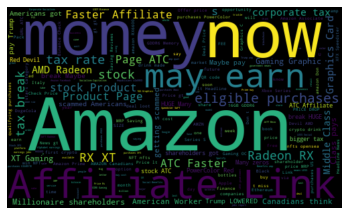

In [12]:
# Plot the word cloud 
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


## Sentiment Analysis

In [13]:
# Function compute negative, positive
def getAnalysis(score):
    if score < 0: 
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Created_at,User_id,Tweets,Subjectivity,Polarity,Analysis
0,2022-02-01 05:15:13,19546277,Why Amazon Prime may cost you more soon by,0.500000,0.500000,Positive
1,2022-02-01 04:26:15,1481342293902708739,HEDGED Bestselling Author Juliana Jones of Nov...,0.000000,0.000000,Neutral
2,2022-02-01 04:24:14,2316191840,An Amazon warehouse manager faces up to 20 yea...,0.500000,-0.300000,Negative
3,2022-02-01 04:05:17,2750115919,Prime is barely worth the cost now I haven t r...,0.300000,0.400000,Positive
4,2022-02-01 02:40:39,1440807890890084358,Why Amazon Prime may cost you more soon via I ...,0.466667,0.200000,Positive
...,...,...,...,...,...,...
406,2022-02-01 03:11:30,1457337469649752071,Meanwhile coastal elites celebrate GDP growth ...,0.356667,0.026667,Positive
407,2022-02-01 03:10:44,1418587410384908293,US In Stock PowerColor Red Devil RX 6800 XT 1...,0.000000,0.000000,Neutral
408,2022-02-01 03:06:33,1377519267143376898,Xbox Series S is now in stock Product Page ATC...,0.000000,0.000000,Neutral
409,2022-02-01 03:06:23,1309851202511831041,ad MSI Radeon RX 6800 Gaming X Trio Carte Grap...,0.000000,0.000000,Neutral


In [14]:
# Display all positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i] )
        print()
        j+=1

1) Why Amazon Prime may cost you more soon by 

2) Prime is barely worth the cost now I haven t received anything in 2 days for months Why Amazon Prime may cost you more soon via 

3) Why Amazon Prime may cost you more soon via I save a hell of a lot more than an additional 20 buying thru Prime I am a price checker and I m well ahead of the game with Amazon thank you 

4)  Obviously You do know the prices for it have gone up astronomically right It s literally too early to tell if it s a viable option since it s been barely studied and only worked in a lab setting Try again 

5)  no doubt it s literally the amazon of decentralized finance doxxed team too get in on the ground floor acceldefi accel accel Thanks Jake 

6) An Amazon warehouse manager faces up to 20 years in jail after pleading guilty to stealing 273 000 worth of computer parts and selling them to a wholesaler via good for him stealing other people property

7) Cryptocurrencies Learn How To Invest On Bitcoin Ethereum And De

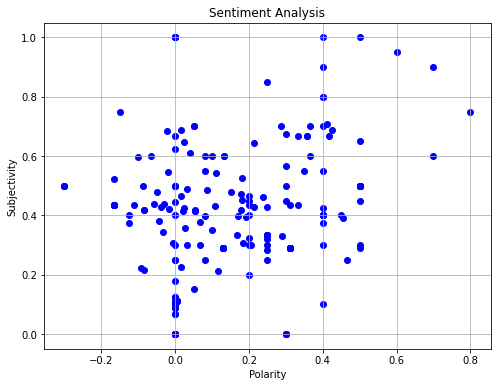

In [19]:
# Plot popularity and subjectivity
plt.figure(figsize=(8,6))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()